Visualize the stuff going on with our different metrics

In [41]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
inpFile = 'quotes/ibm.csv'
myQuote = rq.readQuote( inpFile )

In [3]:
# Daily percentage difference between close/open, rel to open  ( diff_co )
# Daily percentage difference between high/log, rel to open    ( diff_hl )
# Percentage change in volume between days                     ( diff_v  )

diffs = sf.generate_differentials( myQuote )

In [4]:
# Rolling means   of closing values for number of days ( close_mean_<n_days> )
# Rolling stddevs of closing values for number of days ( close_std_<n_days>  )

roll_list = [3,5,10,15,20,25,30]
rolls = sf.generate_rolling_close( myQuote, [ 3, 5, 10, 15, 20, 25, 30 ] )

In [5]:
# Percentage change in the stock price relative to a certain number of days in the past ( momentum_<n_days> )

moms = sf.generate_momentum_close( myQuote, [3,5,10] )

In [6]:
# Relative strength index normalized to 1, 1-1/(1+avg_gains_ndays/avg_loss_ndays)  (rsi_<n_days>)
# Oversold below ~30, overbought above ~70, buy low

rsi = sf.generate_rsi( myQuote, [10,20,30] )

In [7]:
# Generates bollinger band level, -1 at bottom band, 1 at top band  ( bollinger_<n_days> )

bands = sf.generate_bollinger_bands( myQuote, [5,10] )

In [9]:
# Generate shifted differential roll list for comparisons, rolling average with difference between the two days 
# IE for day1_mean = 5, day2_mean=6.5, day2_diff = 1.5
mean_list = []
for i in range( 0, len(roll_list) ):
    mean_list.append( 'close_mean_'+str(roll_list[i]) )

shifted_rolls = rolls[mean_list].copy()
diff_list = []

for i in range( 0, len(roll_list) ):
    diff_list.append( 'diff_'+str(roll_list[i]) )
    shifted_rolls[diff_list[i]] = shifted_rolls[mean_list[i]].shift( roll_list[i] )
    
shifted_rolls = (shifted_rolls.shift(1)-shifted_rolls).shift(-1)
shifted_rolls = shifted_rolls[diff_list]

In [8]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

#colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [32]:
foo = shifted_rolls.join( diffs, how='inner' )

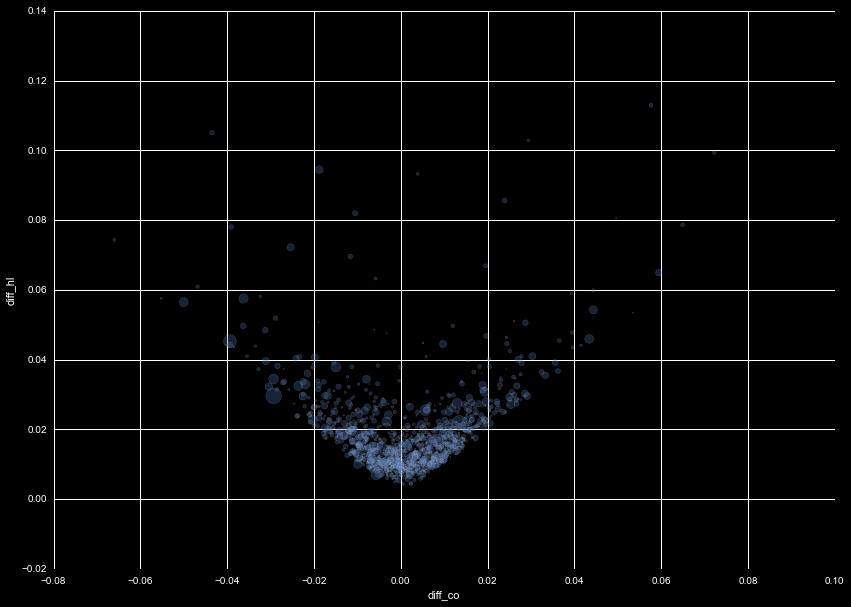

In [33]:
foo.plot.scatter( x='diff_co', y='diff_hl', s=foo.diff_v*50, alpha=0.3 )

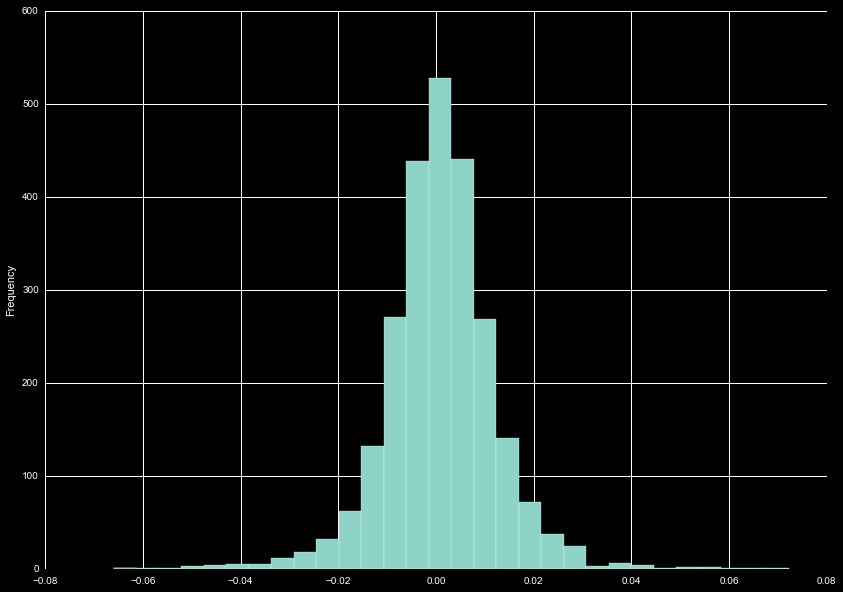

In [37]:
foo['diff_co'].plot.hist( bins=30 )

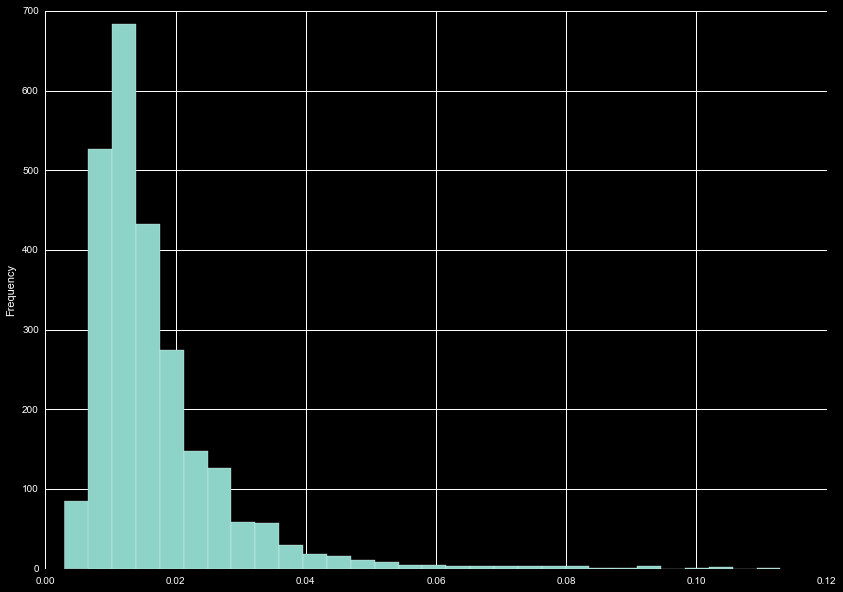

In [38]:
foo['diff_hl'].plot.hist( bins=30 )

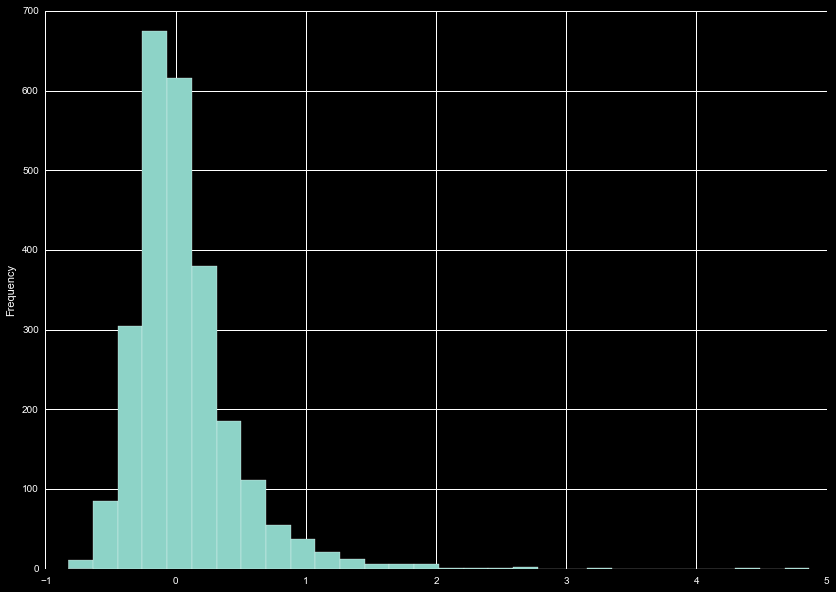

In [39]:
foo['diff_v'].plot.hist( bins=30 )

In [46]:
for col in ['diff_co','diff_hl','diff_v']:
    print col
    foo[col] = rv.scale_column_sigma( foo, col )
    print foo[col].describe()

diff_co
count    2.519000e+03
mean     6.403946e-17
std      1.000000e+00
min     -3.181981e+00
25%     -5.696368e-01
50%     -2.304237e-02
75%      5.697320e-01
max      3.053955e+00
Name: diff_co, dtype: float64
diff_hl
count    2.519000e+03
mean    -4.480779e-16
std      1.000000e+00
min     -1.460918e+00
25%     -6.591271e-01
50%     -2.943958e-01
75%      3.506025e-01
max      3.649461e+00
Name: diff_hl, dtype: float64
diff_v
count    2.519000e+03
mean     8.030496e-16
std      1.000000e+00
min     -2.438058e+00
25%     -6.606011e-01
50%     -1.799928e-01
75%      4.332423e-01
max      3.436186e+00
Name: diff_v, dtype: float64


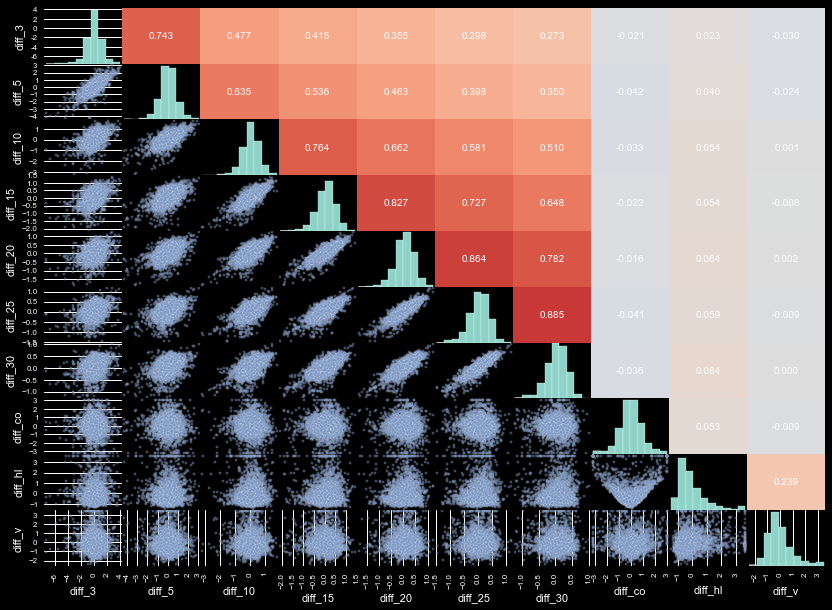

In [47]:
dv.corr_plot( foo )

In [22]:
foo = shifted_rolls.join( rolls, how='inner' )

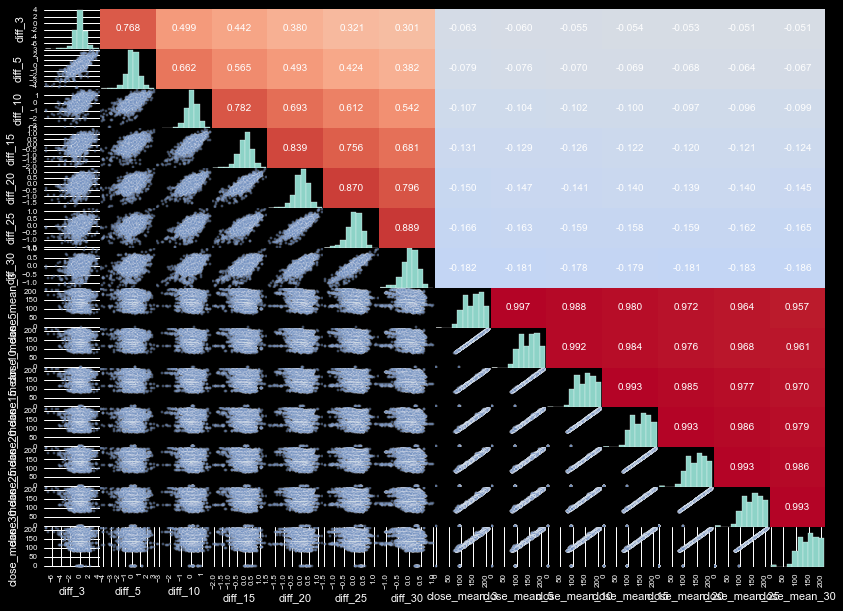

In [23]:
dv.corr_plot( foo[diff_list+mean_list] )

In [48]:
foo = shifted_rolls.join( moms, how='inner' )

In [49]:
mom_list = ['momentum_3','momentum_5','momentum_10']

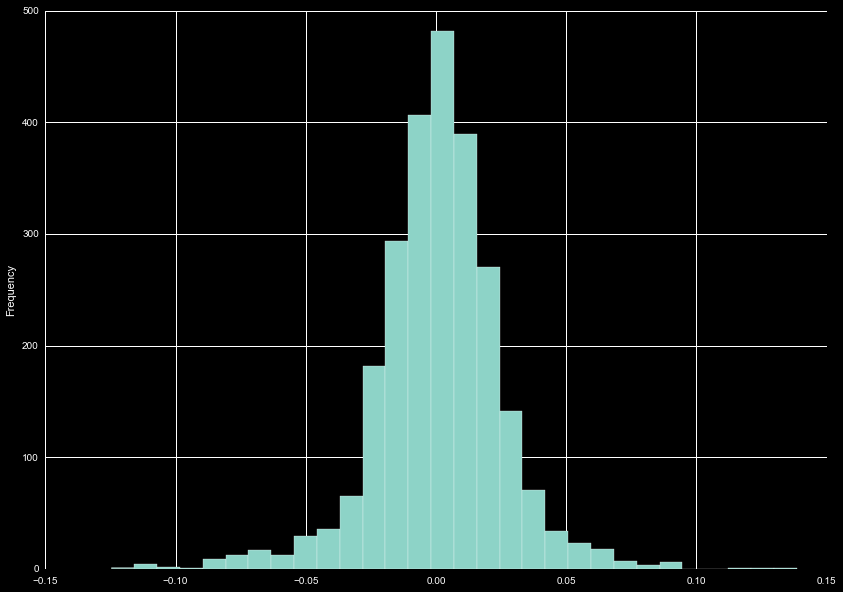

In [50]:
foo[mom_list[0]].plot.hist( bins=30 )

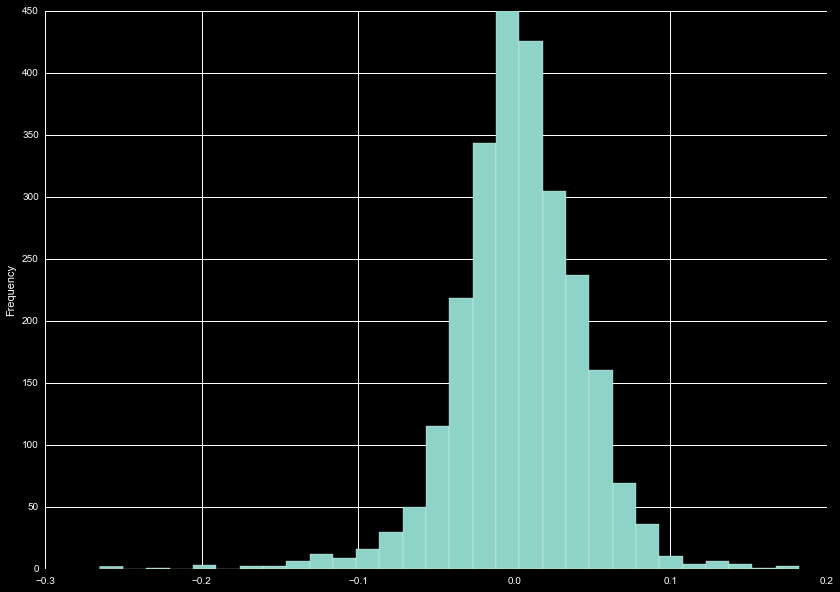

In [51]:
foo[mom_list[2]].plot.hist( bins=30 )

In [52]:
for col in mom_list:
    print col
    foo[col] = rv.scale_column_sigma( foo, col )
    print foo[col].describe()

momentum_3
count    2.519000e+03
mean     3.939661e-17
std      1.000000e+00
min     -3.124445e+00
25%     -5.481694e-01
50%      1.537036e-02
75%      5.563504e-01
max      3.121390e+00
Name: momentum_3, dtype: float64
momentum_5
count    2.519000e+03
mean    -1.176775e-17
std      1.000000e+00
min     -3.027083e+00
25%     -5.411399e-01
50%      5.651168e-03
75%      5.560749e-01
max      3.134765e+00
Name: momentum_5, dtype: float64
momentum_10
count    2.519000e+03
mean    -7.814313e-17
std      1.000000e+00
min     -3.138405e+00
25%     -5.617326e-01
50%     -7.607377e-03
75%      6.174123e-01
max      3.130230e+00
Name: momentum_10, dtype: float64


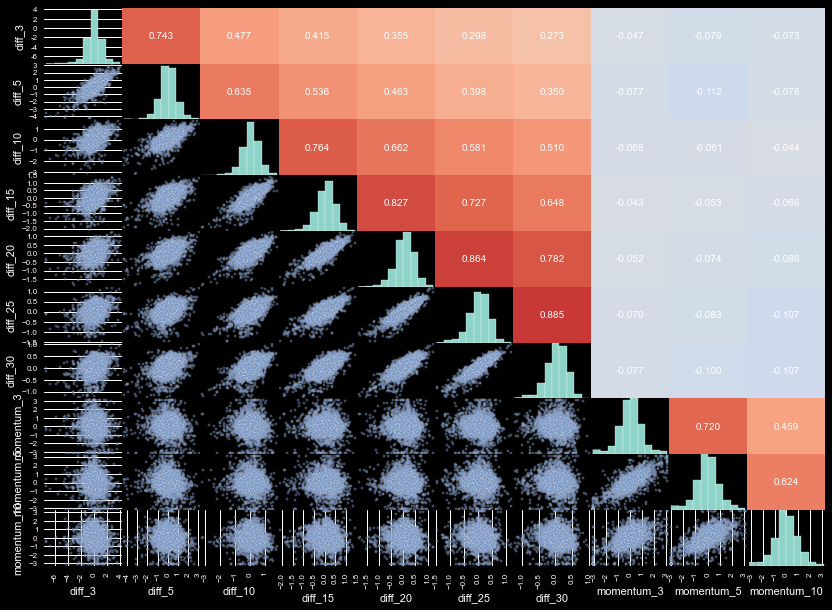

In [53]:
dv.corr_plot( foo )

In [56]:
foo = shifted_rolls.join( rsi, how='inner' )

In [54]:
rsi_list = ['rsi_10','rsi_20','rsi_30']

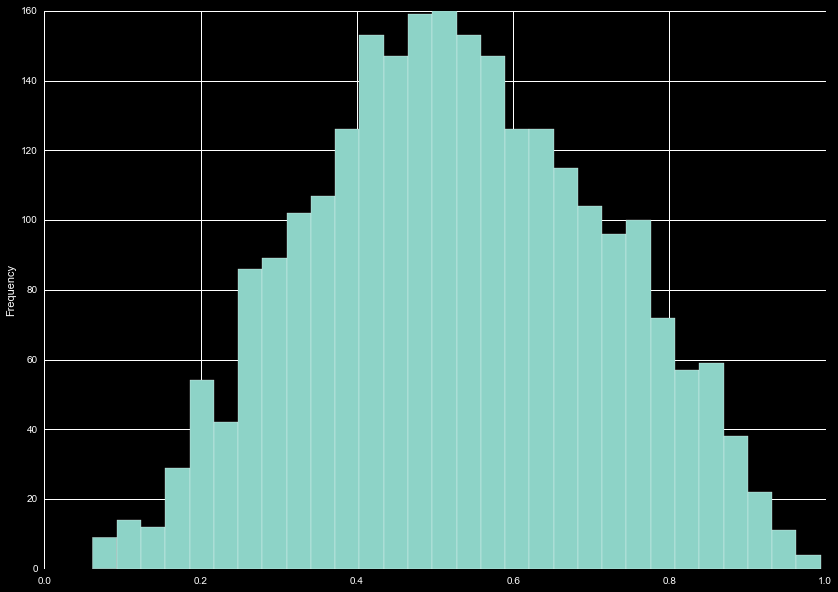

In [57]:
foo[rsi_list[0]].plot.hist( bins=30 )

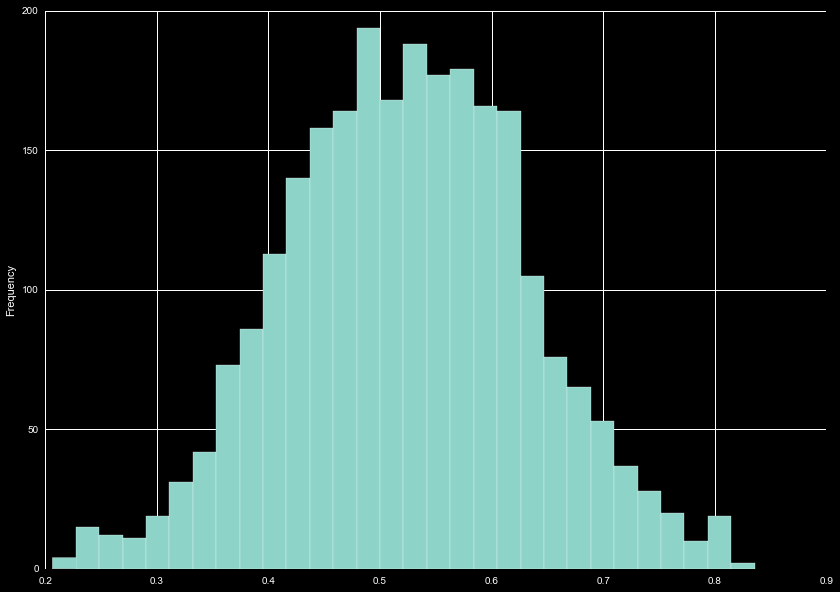

In [58]:
foo[rsi_list[2]].plot.hist( bins=30 )

In [59]:
for col in rsi_list:
    print col
    foo[col] = rv.normalize_column( foo, col, minVal=0.0, maxVal=1.0 )
    print foo[col].describe()

rsi_10
count    2519.000000
mean        0.055436
std         0.372677
min        -0.876712
25%        -0.209354
50%         0.041199
75%         0.334863
max         0.987392
Name: rsi_10, dtype: float64
rsi_20
count    2519.000000
mean        0.052351
std         0.269127
min        -0.712733
25%        -0.137138
50%         0.042928
75%         0.246191
max         0.763115
Name: rsi_20, dtype: float64
rsi_30
count    2519.000000
mean        0.047790
std         0.217277
min        -0.587135
25%        -0.104285
50%         0.048404
75%         0.198169
max         0.671313
Name: rsi_30, dtype: float64


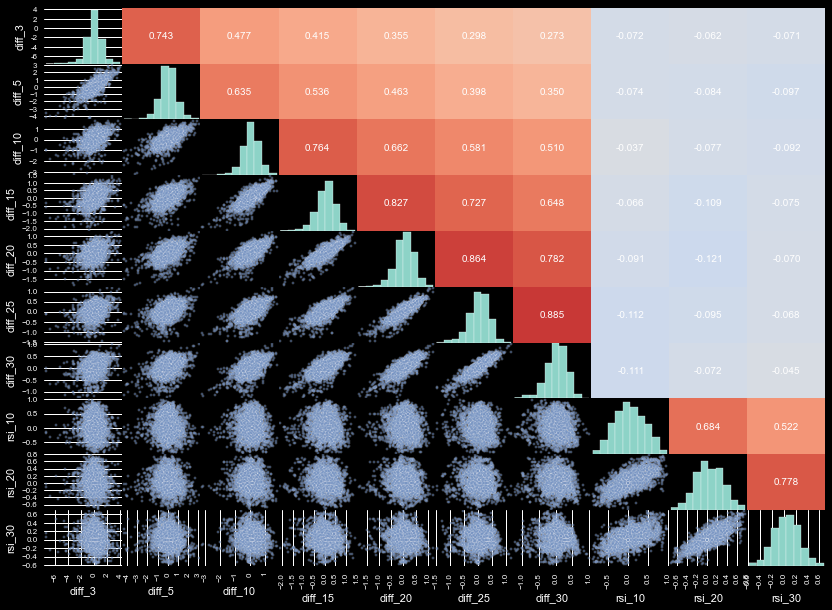

In [60]:
dv.corr_plot( foo )

In [61]:
foo = shifted_rolls.join( bands, how='inner' )

In [66]:
boll_list = ['bollinger_5','bollinger_10']

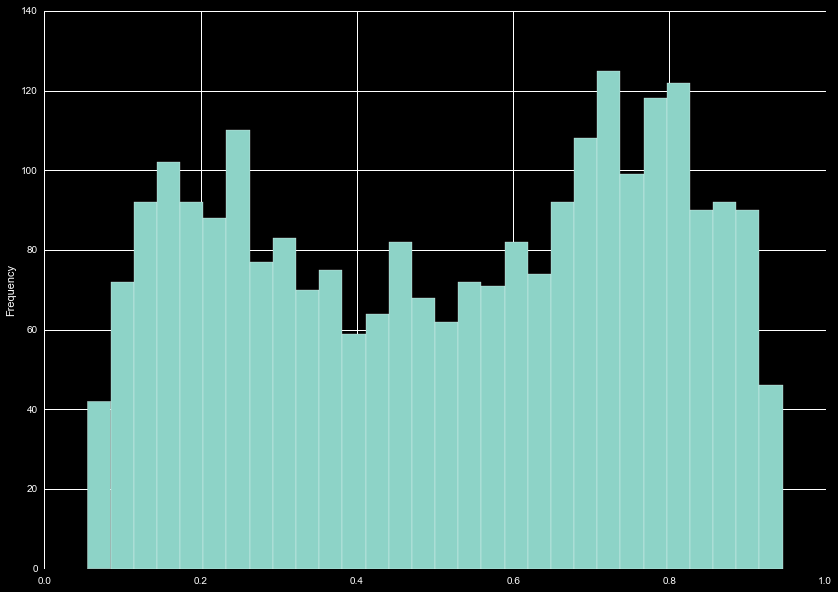

In [63]:
foo[band_list[0]].plot.hist( bins=30 )

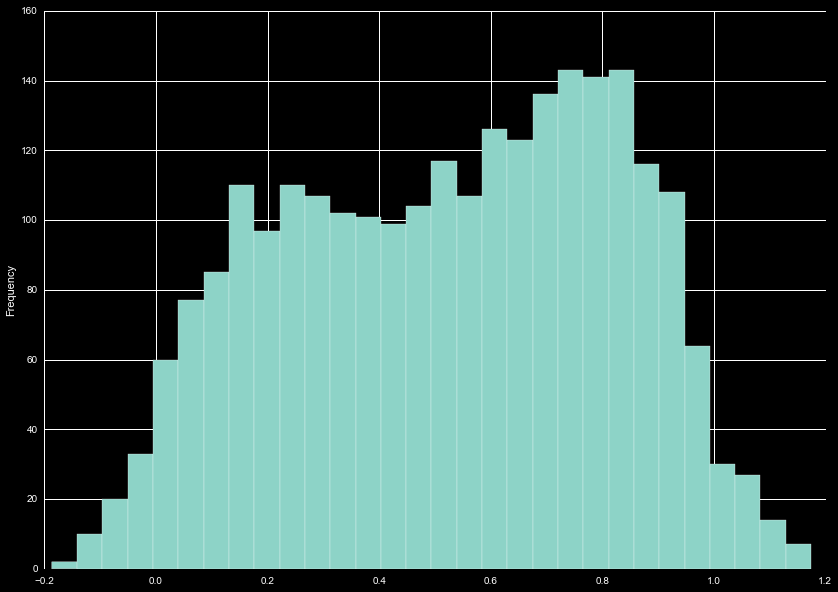

In [64]:
foo[band_list[1]].plot.hist( bins=30 )

In [67]:
for col in boll_list:
    print col
    foo[col] = rv.scale_column_sigma( foo, col )
    print foo[col].describe()

bollinger_5
count    2.519000e+03
mean     5.606208e-17
std      1.000000e+00
min     -1.797470e+00
25%     -9.368286e-01
50%      8.916202e-02
75%      8.858362e-01
max      1.668331e+00
Name: bollinger_5, dtype: float64
bollinger_10
count    2.519000e+03
mean    -3.117131e-17
std      1.000000e+00
min     -2.406250e+00
25%     -8.311105e-01
50%      8.015938e-02
75%      8.374529e-01
max      2.193098e+00
Name: bollinger_10, dtype: float64


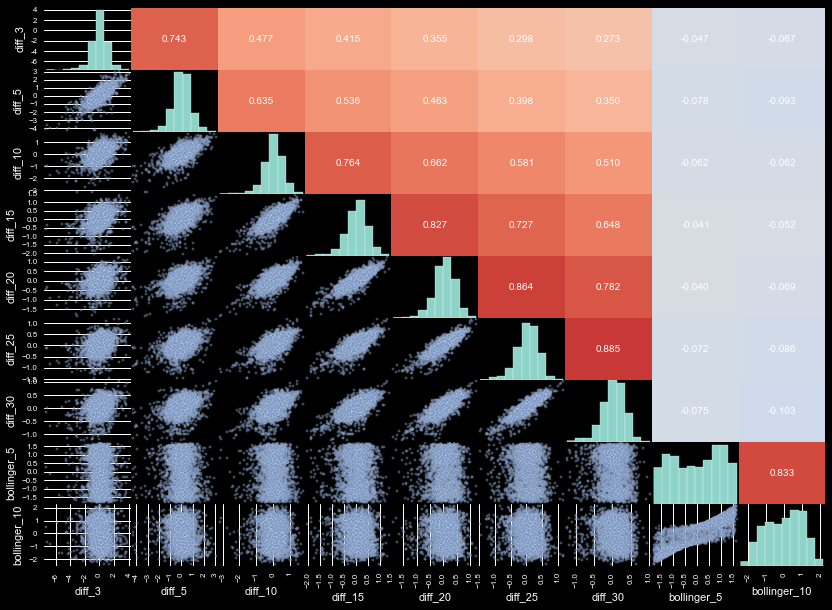

In [68]:
dv.corr_plot( foo )